# Speech

Increasingly, we expect to be able to communicate with artificial intelligence (AI) systems by talking to them, often with the expectation of a spoken response.

![A robot speaking](./images/speech.jpg)

*Speech recognition* (an AI system interpreting spoken language) and *speech synthesis* (an AI system generating a spoken response) are the key components of a speech-enabled AI solution.

## Create a Cognitive Services resource

To build software that can interpret audible speech and respond verbally, you can use the **Speech** cognitive service, which provides a simple way to transcribe spoken language into text and vice-versa.

If you don't already have one, use the following steps to create a **Cognitive Services** resource in your Azure subscription:

1. In another browser tab, open the Azure portal at https://portal.azure.com, signing in with your Microsoft account.
2. Click the **&#65291;Create a resource** button, search for *Cognitive Services*, and create a **Cognitive Services** resource with the following settings:
    - **Name**: *Enter a unique name*.
    - **Subscription**: *Your Azure subscription*.
    - **Location**: *Any available location*.
    - **Pricing tier**: S0
    - **Resource group**: *Create a resource group with a unique name*.
3. Wait for deployment to complete. Then go to your cognitive services resource, and on the **Overview** page, click the link to manage the keys for the service. You will need the endpoint and keys to connect to your cognitive services resource from client applications.

### Get the Key and Endpoint for your Cognitive Services resource

To use your cognitive services resource, client applications need its  endpoint and authentication key:

1. In the Azure portal, on the **Keys and Endpoint** page for your cognitive service resource, copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
2. Copy the **Endpoint** for your resource and and paste it in the code below, replacing **YOUR_COG_ENDPOINT**.
3. Copy the **Location** for your resource and and paste it in the code below, replacing **YOUR_COG_REGION**.
4. Run the code below by clicking the **Run cell** (&#9655;) button to the left of the cell.

In [1]:
cog_key = ''
cog_endpoint = 'https://dom-face-recognition-574.cognitiveservices.azure.com/'
cog_region = 'eastus'

print('Ready to use cognitive services in {} using key {}'.format(cog_region, cog_key))

Ready to use cognitive services in eastus using key b4b666ffdb104652a584563442ce4970


To use the Speech service in your Cognitive Services resource, you'll need to install the Azure Cognitive Services Speech SDK

In [9]:
! pip install azure.cognitiveservices.speech
! pip install sounddevice
! pip install soundfile

You should consider upgrading via the 'C:\Users\domro\Documents\Dell-NTU\NTU 21-22\Artificial Intelligence\ai-fundamentals\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\domro\Documents\Dell-NTU\NTU 21-22\Artificial Intelligence\ai-fundamentals\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\domro\Documents\Dell-NTU\NTU 21-22\Artificial Intelligence\ai-fundamentals\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Speech recognition

Suppose you want to build a home automation system that accepts spoken instructions, such as "turn the light on" or "turn the light off". Your application needs to be able to take the audio-based input (your spoken instruction), and interpret it by transcribing it to text that it can then parse and analyze.

Now you're ready to transcribe some speech. The input can be a microphone or an audio file. In this case, you'll use an audio file.

Run the cell below to use the speech-to-text capabilities of the Speech service to transcribe the audio.

In [17]:
import os
import IPython
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig
import sounddevice as sd
import soundfile as sf

# Get spoken command from audio file
file_name = 'light-off.wav'
audio_file = os.path.join('data', 'speech', file_name)

# Configure speech recognizer
speech_config = SpeechConfig(cog_key, cog_region)
audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
speech_recognizer = SpeechRecognizer(speech_config, audio_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()

# Play audio and show transcribed text
IPython.display.display(IPython.display.Audio(audio_file, autoplay=True),
                        IPython.display.HTML(speech.text))

filename = './data/speech/light-on.wav'
# Extract data and sampling rate from file
data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing


Try changing the **file_name** variable to *light-off.wav*, and run the cell again. The service should be able to transcribe both files correctly to text.

## Speech synthesis

So now you've seen how the Speech service can be used to transcribe speech into text; but what about the opposite? How can you convert text into speech?

Well, let's assume your home automation system has interpreted a command to turn the light on. An appropriate response might be to acknowledge the command verbally (as well as actually performing the commanded task!)

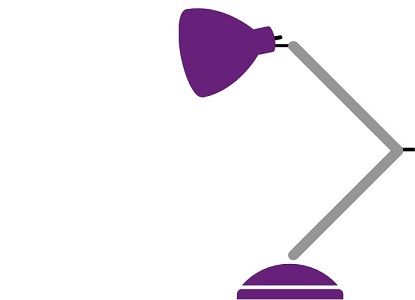

In [18]:
import os
import IPython
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig

# Get text to be spoken
response_text = 'Turning the light off.'

# Configure speech synthesis
speech_config = SpeechConfig(cog_key, cog_region)
output_file = os.path.join('data', 'speech', 'response.wav')
audio_output = AudioConfig(filename=output_file) # Use a file instead of default (speakers)
speech_synthesizer = SpeechSynthesizer(speech_config, audio_output)

# Transcribe text into speech
result = speech_synthesizer.speak_text(response_text)

# Play the output audio file
IPython.display.display(IPython.display.Audio(output_file, autoplay=True),
                        IPython.display.Image(data=os.path.join("data", "speech" , response_text.lower() + 'jpg')))

Try changing the **response_text** variable to *Turning the light off.* (including the period at the end) and run the cell again to hear the result.

## Learn more

You've seen a very simple example of using the Speech cognitive service in this notebook. You can learn more about [speech-to-text](https://docs.microsoft.com/azure/cognitive-services/speech-service/index-speech-to-text) and [text-to-speech](https://docs.microsoft.com/azure/cognitive-services/speech-service/index-text-to-speech) in the Speech service documentation.